In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url1 = "https://raw.githubusercontent.com/souraOP/Projects-Labmentix/refs/heads/main/Medibuddy%20Project/Insurance_Data_Price.csv"
df1 = pd.read_csv(url1)
df1.head(10)

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520
5,PLC156943,31,female,25.740,3756.62160
6,PLC156952,46,female,33.440,8240.58960
7,PLC156961,37,female,27.740,7281.50560
8,PLC156970,37,male,29.830,6406.41070
9,PLC156979,60,female,25.840,28923.13692


In [3]:
df1.shape

(1338, 5)

In [4]:
url2 = "https://raw.githubusercontent.com/souraOP/Projects-Labmentix/refs/heads/main/Medibuddy%20Project/Insurance_Data_Personal_Details.csv"
df2 = pd.read_csv(url2)
df2.head(10)

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest
5,PLC157231,0,no,southwest
6,PLC157303,0,no,southwest
7,PLC157483,0,no,southwest
8,PLC157492,2,no,southwest
9,PLC157546,3,no,southwest


In [5]:
df2.shape

(1338, 4)

### Merging both the dataset using Policy No. as the primary key

In [6]:
dataset = df1.merge(df2, on='Policy no.', how='left')
dataset.head(10)

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest
5,PLC156943,31,female,25.740,3756.62160,0,no,southeast
6,PLC156952,46,female,33.440,8240.58960,1,no,southeast
7,PLC156961,37,female,27.740,7281.50560,3,no,northwest
8,PLC156970,37,male,29.830,6406.41070,2,no,northeast
9,PLC156979,60,female,25.840,28923.13692,0,no,northwest


In [7]:
dataset.shape

(1338, 8)

### Since after merging both the datasets we don't need the Policy No. column we can drop it!

In [8]:
dataset.drop('Policy no.', axis=1, inplace=True)
dataset.head(10)

,age,sex,bmi,charges in INR,children,smoker,region
0,19,female,27.900,16884.92400,0,yes,southwest
1,18,male,33.770,1725.55230,1,no,southeast
2,28,male,33.000,4449.46200,3,no,southeast
3,33,male,22.705,21984.47061,0,no,northwest
4,32,male,28.880,3866.85520,0,no,northwest
5,31,female,25.740,3756.62160,0,no,southeast
6,46,female,33.440,8240.58960,1,no,southeast
7,37,female,27.740,7281.50560,3,no,northwest
8,37,male,29.830,6406.41070,2,no,northeast
9,60,female,25.840,28923.13692,0,no,northwest


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   object 
 2   bmi             1338 non-null   float64
 3   charges in INR  1338 non-null   float64
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   object 
 6   region          1338 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
charges in INR,0
children,0
smoker,0
region,0


In [11]:
dataset.duplicated().sum()

np.int64(1)

<Axes: >

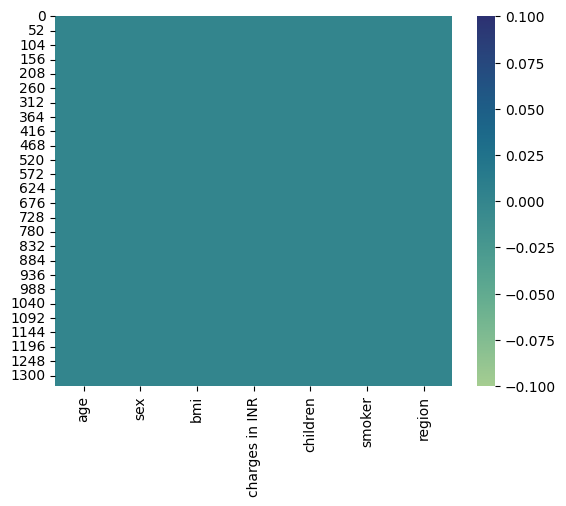

In [12]:
sns.heatmap(dataset.isnull(), cmap='crest')

In [13]:
dataset.describe()

,age,bmi,charges in INR,children
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,1.094918
std,14.049960,6.098187,12110.011237,1.205493
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9382.033000,1.000000
75%,51.000000,34.693750,16639.912515,2.000000
max,64.000000,53.130000,63770.428010,5.000000


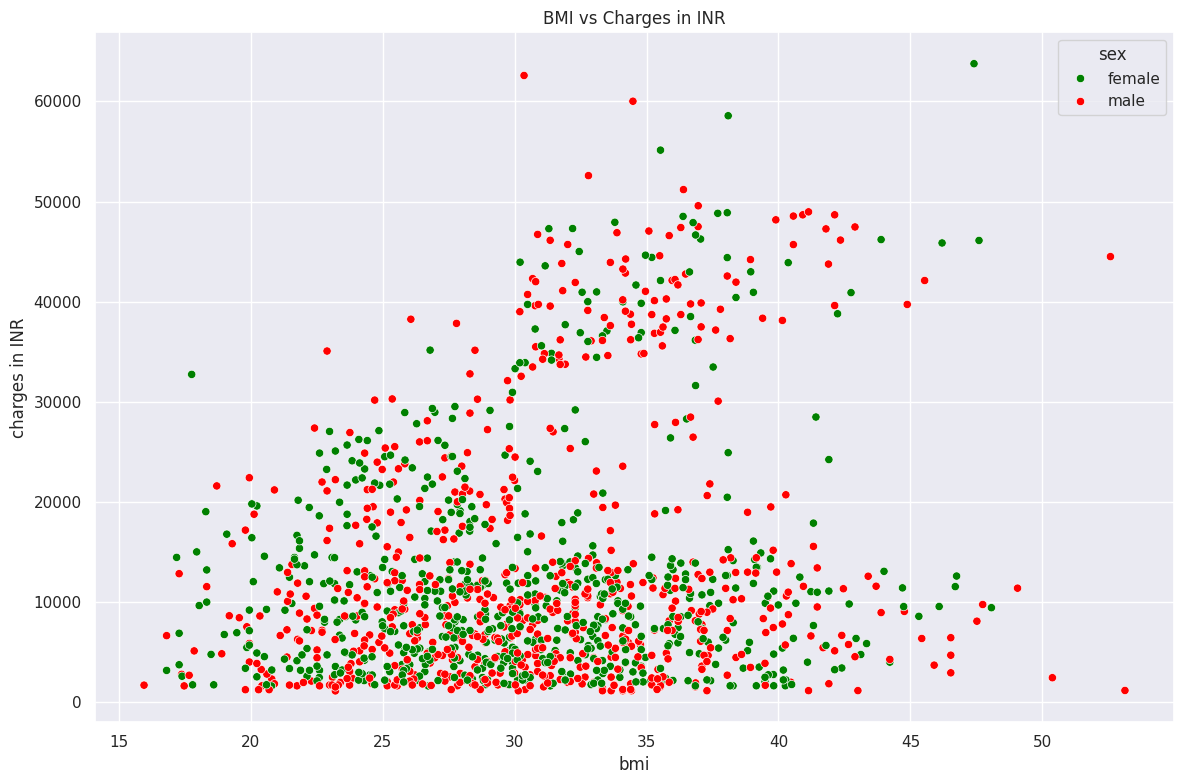

In [14]:
sns.set()
plt.figure(figsize=(12, 8))
plt.title('BMI vs Charges in INR')
sns.scatterplot(x='bmi', y='charges in INR', data=dataset, hue='sex', palette=['green', 'red'])
plt.tight_layout()
plt.show()

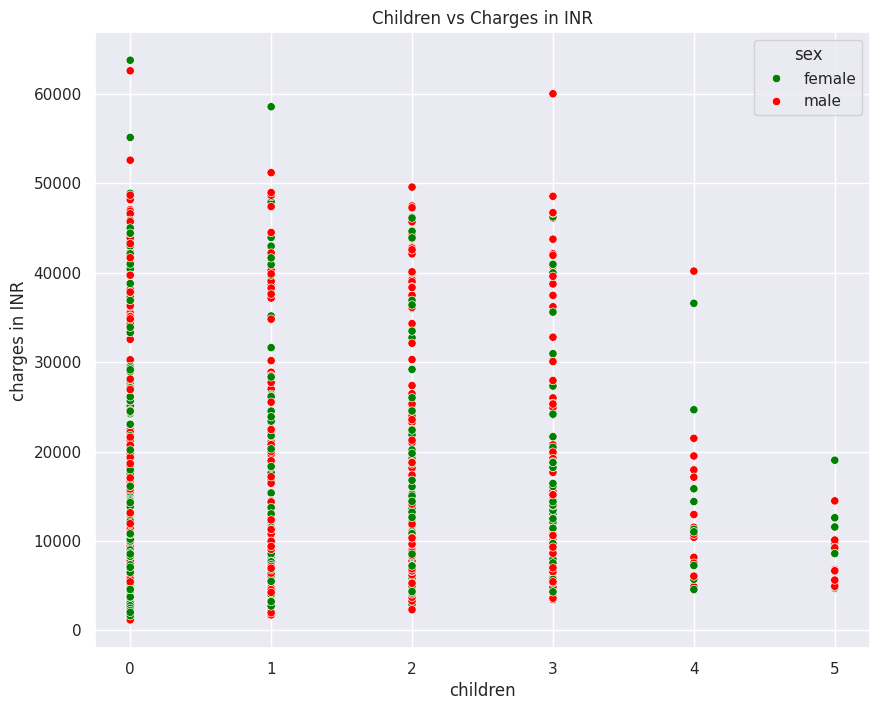

In [15]:
plt.figure(figsize=(10, 8))
plt.title('Children vs Charges in INR')
sns.scatterplot(x='children', y='charges in INR', data=dataset, hue='sex', palette=['green', 'red'])
plt.show()

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges in INR'>

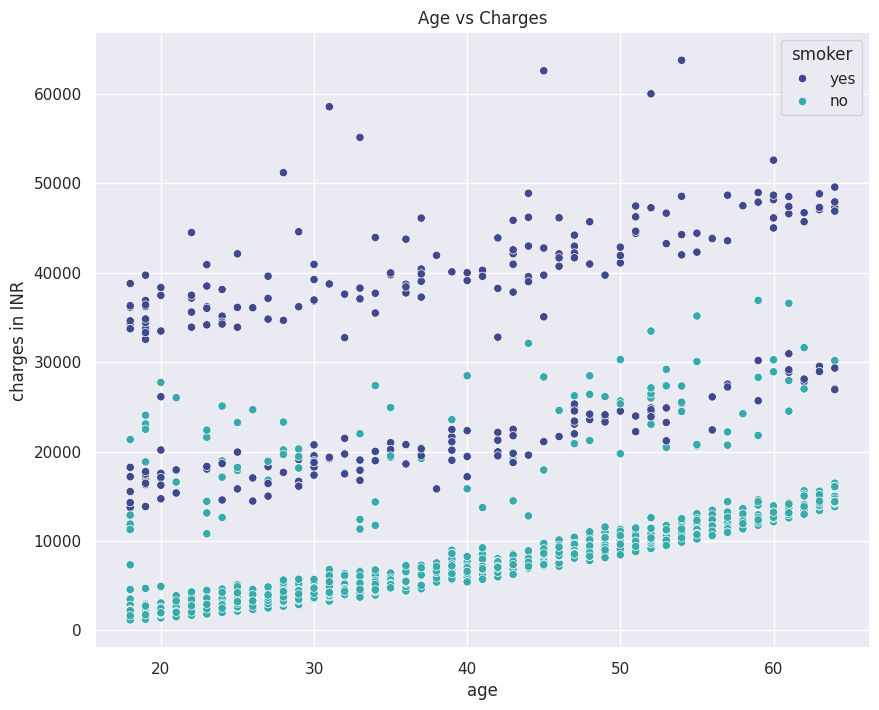

In [16]:
plt.figure(figsize=(10, 8))
plt.title('Age vs Charges')
sns.scatterplot(x='age', y='charges in INR', data=dataset, hue='smoker', palette='mako')

<Axes: title={'center': 'Ages vs Charges'}, xlabel='age', ylabel='charges in INR'>

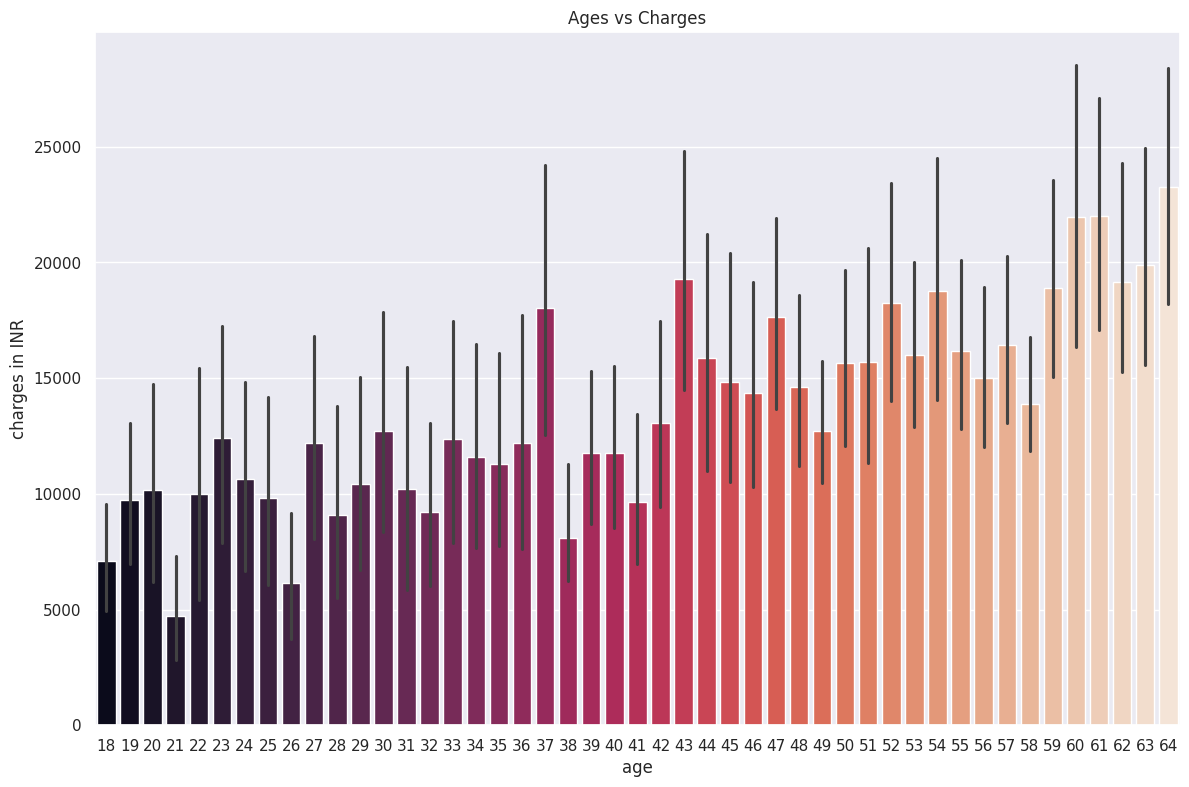

In [17]:
plt.figure(figsize=(14, 9))
plt.title("Ages vs Charges")
sns.barplot(x='age', y = 'charges in INR', data=dataset, palette='rocket')

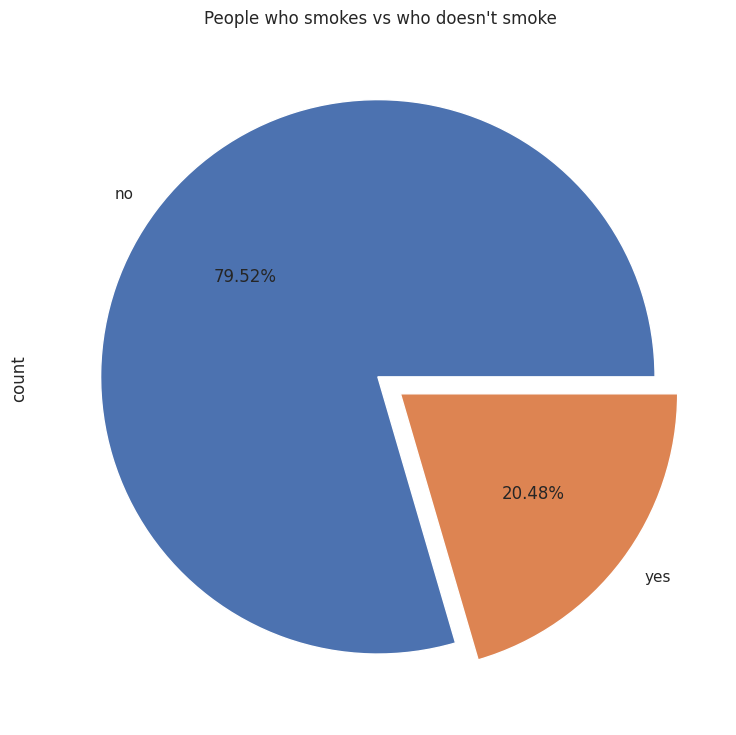

In [18]:
plt.figure(figsize=(10, 9))
plt.title("People who smokes vs who doesn't smoke")
dataset['smoker'].value_counts().plot(kind='pie', autopct="%.2f%%", explode=[0.01, 0.092], color=['green', 'blue'])
plt.show()

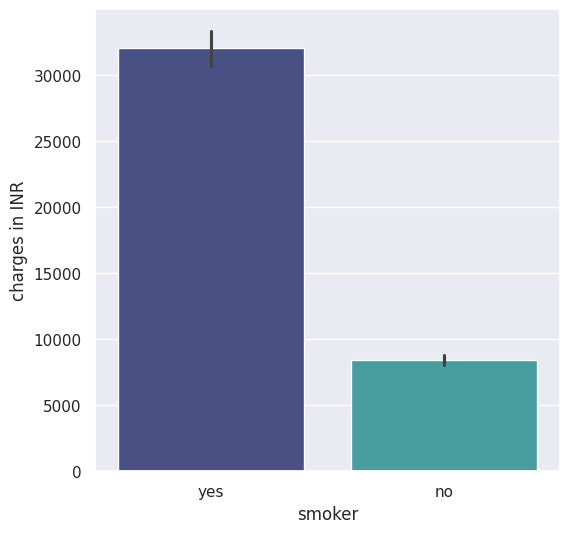

In [19]:
f, ax = plt.subplots(1,1, figsize=(6,6))
ax = sns.barplot(x = 'smoker', y = 'charges in INR'
               ,hue='smoker', data=dataset, palette='mako')

<Figure size 1200x900 with 0 Axes>

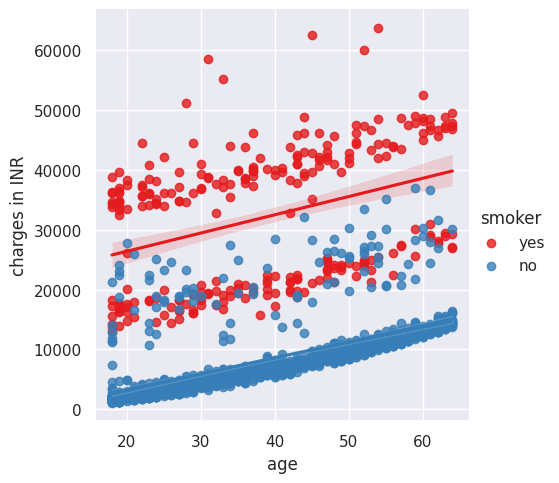

In [20]:
plt.figure(figsize=(12, 9))
sns.lmplot(x='age', y = 'charges in INR', data=dataset, hue='smoker', palette='Set1')
plt.show()

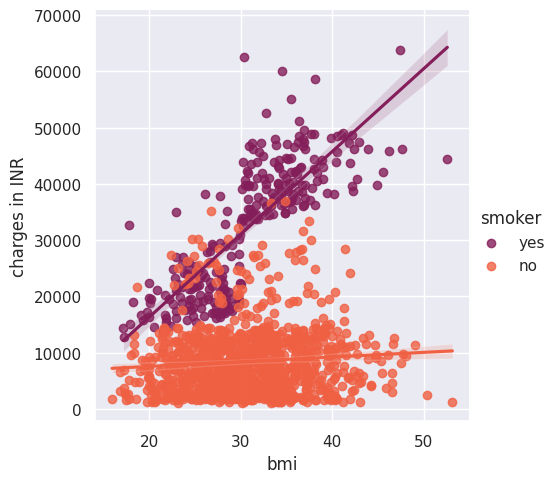

In [21]:
ax = sns.lmplot(x='bmi', y = 'charges in INR', data=dataset, hue='smoker', palette='rocket')

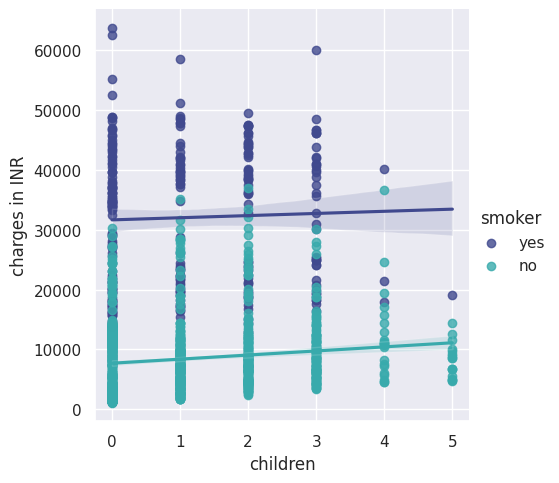

In [22]:
ax = sns.lmplot(x='children', y = 'charges in INR', data=dataset, hue='smoker', palette='mako')

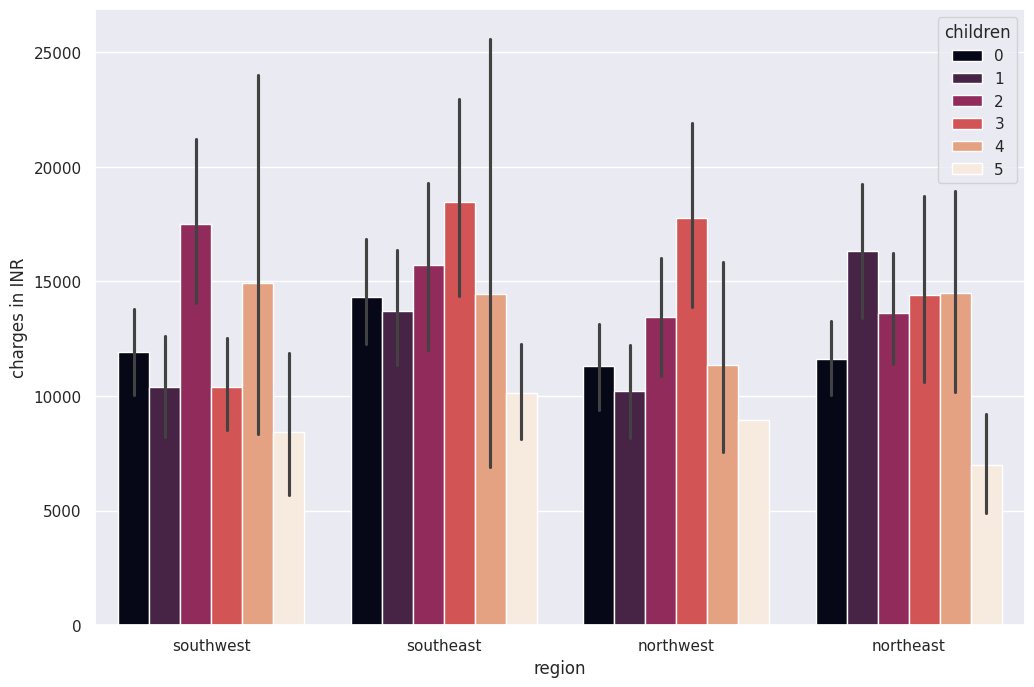

In [23]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges in INR', hue='children', data=dataset, palette='rocket')

## LabelEncoding

In [24]:
from sklearn.preprocessing import LabelEncoder

def LabelEncoding(dataset):
  ll=LabelEncoder()
  for i in dataset.columns:
    # select only those columns whose datatypes are 'object'
    if dataset[i].dtypes=='object':
      dataset[i] = ll.fit_transform(dataset[i])

  return dataset


In [25]:
dataset = LabelEncoding(dataset)
dataset.head(10)

,age,sex,bmi,charges in INR,children,smoker,region
0,19,0,27.900,16884.92400,0,1,3
1,18,1,33.770,1725.55230,1,0,2
2,28,1,33.000,4449.46200,3,0,2
3,33,1,22.705,21984.47061,0,0,1
4,32,1,28.880,3866.85520,0,0,1
5,31,0,25.740,3756.62160,0,0,2
6,46,0,33.440,8240.58960,1,0,2
7,37,0,27.740,7281.50560,3,0,1
8,37,1,29.830,6406.41070,2,0,0
9,60,0,25.840,28923.13692,0,0,1


In [26]:
X = dataset.drop('charges in INR', axis=1)
y = dataset['charges in INR']

In [27]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [28]:
y

,charges in INR
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


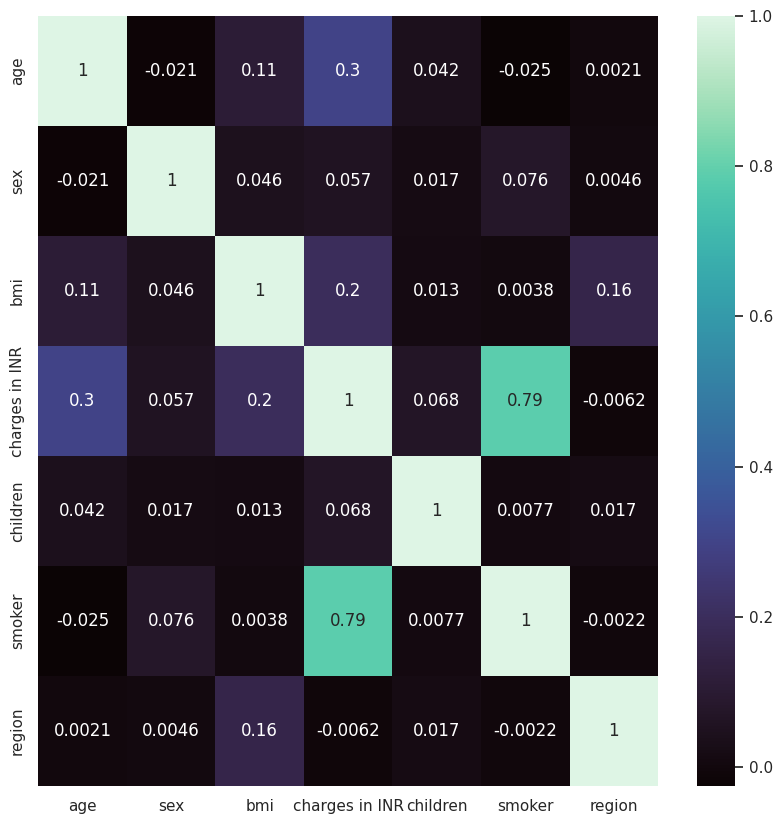

In [29]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(dataset.corr(), annot=True, cmap='mako')

In [30]:
from sklearn.preprocessing import StandardScaler
z = dataset.drop('charges in INR', axis = 1)
z = StandardScaler().fit_transform(z)
z = pd.DataFrame(z)
z.head(10)

,0,1,2,3,4,5
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
5,-0.584350,-1.010519,-0.807656,-0.908614,-0.507463,0.438495
6,0.483668,-1.010519,0.455486,-0.078767,-0.507463,0.438495
7,-0.157143,-1.010519,-0.479567,1.580926,-0.507463,-0.466915
8,-0.157143,0.989591,-0.136714,0.751079,-0.507463,-1.372326
9,1.480485,-1.010519,-0.791252,-0.908614,-0.507463,-0.466915


In [31]:
dataset = z.join(dataset['charges in INR'])
dataset.head(10)

,0,1,2,3,4,5,charges in INR
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,16884.92400
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,1725.55230
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,4449.46200
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,21984.47061
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,3866.85520
5,-0.584350,-1.010519,-0.807656,-0.908614,-0.507463,0.438495,3756.62160
6,0.483668,-1.010519,0.455486,-0.078767,-0.507463,0.438495,8240.58960
7,-0.157143,-1.010519,-0.479567,1.580926,-0.507463,-0.466915,7281.50560
8,-0.157143,0.989591,-0.136714,0.751079,-0.507463,-1.372326,6406.41070
9,1.480485,-1.010519,-0.791252,-0.908614,-0.507463,-0.466915,28923.13692


In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from xgboost import XGBRegressor
import xgboost
from sklearn.cluster import KMeans


import statsmodels.api as sm

In [33]:
def trainAndTestSplit(data,t_col,testsize=0.3):
  x = data.drop(t_col,axis=1)
  y = data[t_col]
  return train_test_split(x,y,test_size=testsize,random_state=0)

def build_model(model_name,estimator,data,t_col):
  x_train,x_test,y_train,y_test = trainAndTestSplit(data,t_col)
  estimator.fit(x_train,y_train)
  y_pred = estimator.predict(x_test)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  r2score = r2_score(y_test,y_pred)

  return [model_name,rmse,r2score]

In [34]:
def multiple_models(data, t_col):
  col_names=['Model name','RMSE','R2 score']
  result = pd.DataFrame(columns=col_names)
  result.loc[len(result)]  = build_model('Linear Regression', LinearRegression(),data,t_col)
  result.loc[len(result)]  = build_model('Lasso', Lasso(),data,t_col)
  result.loc[len(result)]  = build_model('Ridge', Ridge(),data,t_col)
  result.loc[len(result)]  = build_model('DT Regression', DecisionTreeRegressor(),data,t_col)
  result.loc[len(result)]  = build_model('KN Regression', KNeighborsRegressor(),data,t_col)
  result.loc[len(result)]  = build_model('SV Regression', SVR(),data,t_col)
  result.loc[len(result)]  = build_model('RF Regression', RandomForestRegressor(max_features='log2', n_estimators=150),data,t_col)
  result.loc[len(result)]  = build_model('XGB Regression', XGBRegressor(alpha= 0, gamma= 0, reg_lambda= 1),data,t_col)

  return result.sort_values(['R2 score'],ascending=False)

In [35]:
multiple_models(dataset,'charges in INR')

,Model name,RMSE,R2 score
6,RF Regression,4527.694965,0.871449
4,KN Regression,5118.917754,0.835684
7,XGB Regression,5366.538168,0.819403
0,Linear Regression,5771.599023,0.791111
1,Lasso,5771.789073,0.791098
2,Ridge,5772.667796,0.791034
3,DT Regression,7000.450274,0.692692
5,SV Regression,13151.424321,-0.084596


In [36]:
def k_fold_cv(x,y,fold=10):
  score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
  score_ls = cross_val_score(Lasso(),x,y,cv=fold)
  score_rd = cross_val_score(Ridge(),x,y,cv=fold)
  score_xg = cross_val_score(XGBRegressor(),x,y,cv=fold)
  score_rf = cross_val_score(RandomForestRegressor(),x,y,cv=fold)
  score_dt = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
  score_knn = cross_val_score(KNeighborsRegressor(),x,y,cv=fold)
  score_svr = cross_val_score(SVR(),x,y,cv=fold)

  model_names = ['Linear Reg.', 'Lasso','Ridge','XGboost','Random Forest','DTR','KNN','SVR']
  scores = [score_lr,score_ls,score_rd,score_xg,score_rf,score_dt,score_knn,score_svr]
  result = []

  for i in range(len(model_names)):
      score_mean = np.mean(scores[i])
      score_std = np.std(scores[i])
      m_name = model_names[i]
      result.append([m_name,score_mean,score_std])

  k_fold_df = pd.DataFrame(result,columns=['Model Name','Avg. R2','STD R2 score'])

  return k_fold_df.sort_values(['Avg. R2'],ascending=False)

In [37]:
k_fold_cv(dataset.drop('charges in INR',axis=1),dataset['charges in INR'])

,Model Name,Avg. R2,STD R2 score
4,Random Forest,0.834123,0.046499
6,KNN,0.808240,0.039409
3,XGboost,0.806592,0.054543
2,Ridge,0.744813,0.041785
1,Lasso,0.744809,0.041846
0,Linear Reg.,0.744805,0.041861
5,DTR,0.694440,0.050277
7,SVR,-0.099883,0.030410


In [38]:
def tuning_shit(x,y,fold=10):
  param_xgboost = {'alpha':[0,1],'gamma':[0,10,20,30,40,50],'reg_lambda':[0,1]}
  param_rf = {'n_estimators':[50,100,150],'max_features':['auto','log2']}

  tune_xgb = GridSearchCV(XGBRegressor(),param_xgboost,cv=fold)
  tune_rf = GridSearchCV(RandomForestRegressor(),param_rf,cv=fold)

  tune_xgb.fit(x,y)
  tune_rf.fit(x,y)

  tuned = [tune_xgb,tune_rf]
  models = ['Xgboost','Random Forest']

  for i in range(len(tuned)):
      print('Models :',models[i])
      print('Best params :',tuned[i].best_params_)

In [39]:
tuning_shit(dataset.drop('charges in INR',axis=1), dataset['charges in INR'])

Models : Xgboost
Best params : {'alpha': 1, 'gamma': 0, 'reg_lambda': 1}
Models : Random Forest
Best params : {'max_features': 'log2', 'n_estimators': 150}


In [40]:
def cv_hpt(x,y,fold=10):
  score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
  score_ls = cross_val_score(Lasso(),x,y,cv=fold)
  score_rd = cross_val_score(Ridge(),x,y,cv=fold)
  score_xg = cross_val_score(XGBRegressor(alpha=1,gamma=20,reg_lambda=1),x,y,cv=fold)
  score_rf = cross_val_score(RandomForestRegressor(max_features='log2',n_estimators=100),x,y,cv=fold)
  score_dt = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
  score_knn = cross_val_score(KNeighborsRegressor(),x,y,cv=fold)
  score_svr = cross_val_score(SVR(),x,y,cv=fold)

  model_names = ['Linear Reg.', 'Lasso','Ridge','XGboost','Random Forest','DTR','KNN','SVR']
  scores = [score_lr,score_ls,score_rd,score_xg,score_rf,score_dt,score_knn,score_svr]
  result = []

  for i in range(len(model_names)):
      score_mean = np.mean(scores[i])
      score_std = np.std(scores[i])
      m_name = model_names[i]
      result.append([m_name,score_mean,score_std])

  k_fold_df = pd.DataFrame(result,columns=['Model Name','Avg. R2','STD R2 score'])

  return k_fold_df.sort_values(['Avg. R2'],ascending=False)

In [41]:
cv_hpt(dataset.drop('charges in INR',axis=1), dataset['charges in INR'])

,Model Name,Avg. R2,STD R2 score
4,Random Forest,0.842375,0.043803
6,KNN,0.808240,0.039409
3,XGboost,0.808091,0.053513
2,Ridge,0.744813,0.041785
1,Lasso,0.744809,0.041846
0,Linear Reg.,0.744805,0.041861
5,DTR,0.691650,0.062640
7,SVR,-0.099883,0.030410


In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [43]:
xg = XGBRegressor(alpha=0.4)
xg.fit(x_train,y_train)

XGBRegressor(alpha=0.4, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

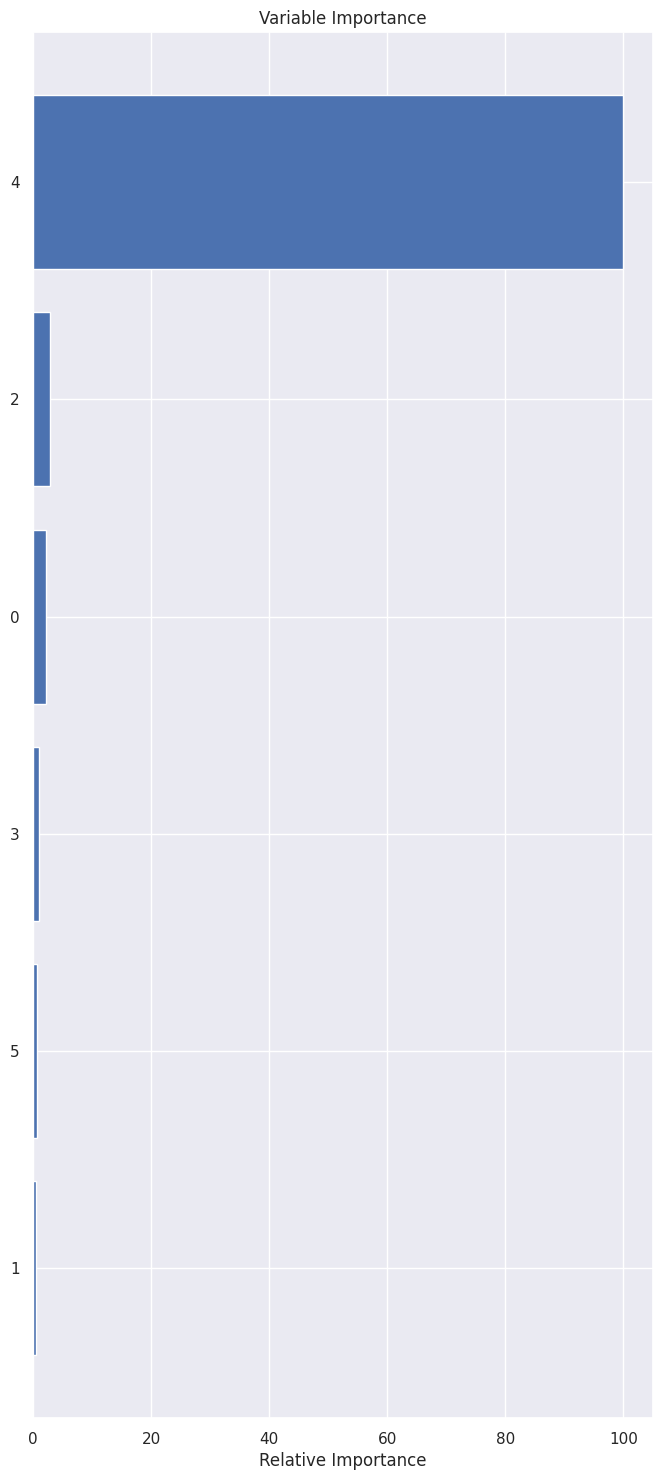

In [44]:
tr_x = dataset.drop('charges in INR',axis=1)
feature_importance = xg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, tr_x.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [45]:
dataset = df1.merge(df2, on='Policy no.', how='left')
dataset.head(10)

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest
5,PLC156943,31,female,25.740,3756.62160,0,no,southeast
6,PLC156952,46,female,33.440,8240.58960,1,no,southeast
7,PLC156961,37,female,27.740,7281.50560,3,no,northwest
8,PLC156970,37,male,29.830,6406.41070,2,no,northeast
9,PLC156979,60,female,25.840,28923.13692,0,no,northwest


In [46]:
dataset_region = pd.get_dummies(dataset['region'], drop_first=True).values
y = dataset['charges in INR'].values
xg = XGBRegressor()
xg.fit(dataset_region,y)

y_pred= xg.predict(dataset_region)
r2_score(y, y_pred)

0.006634016807024468

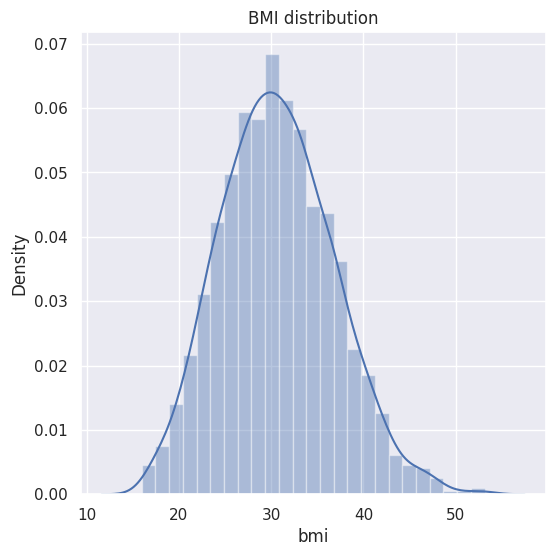

In [47]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['bmi'] )
plt.title('BMI distribution')
plt.show()

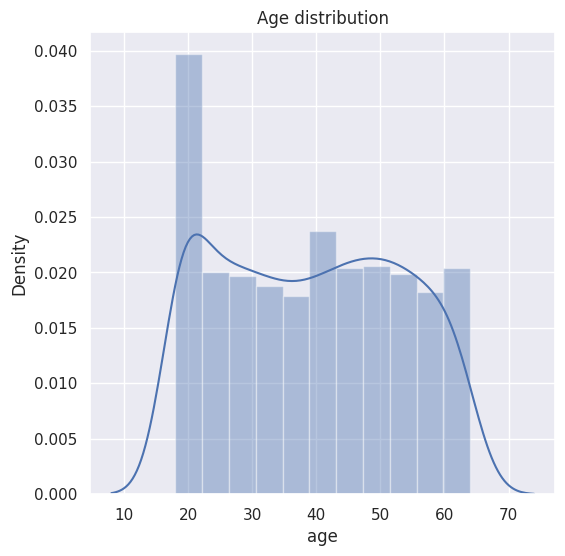

In [49]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['age'])
plt.title('Age distribution')
plt.show()